In [1]:
#  Gọi các thư viên cần thiết
import numpy as np
import pandas as pd
import math
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score

from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten,LeakyReLU
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping

In [2]:
# Khởi tạo các giá trị của đầu công tác
data_robot2DoF =[]
L1 = 50
L2 = 40

for theta1 in range(-90,90):
  for theta2 in range(-90,90):
    Px = L1*np.cos(np.radians(theta1)) + L2*np.cos(np.radians(theta1 + theta2))
    Py = L1*np.sin(np.radians(theta1)) + L2*np.sin(np.radians(theta1 + theta2))
    data_robot2DoF.append([theta1, theta2, Px ,Py])
data = pd.DataFrame(data_robot2DoF, columns = ['theta1', 'theta2', 'Px','Py'])
data

,theta1,theta2,Px,Py
0,-90,-90,-40.000000,-50.000000
1,-90,-89,-39.993908,-50.698096
2,-90,-88,-39.975633,-51.395980
3,-90,-87,-39.945181,-52.093438
4,-90,-86,-39.902562,-52.790259
...,...,...,...,...
32395,89,85,-38.908255,54.173523
32396,89,86,-38.975168,53.478614
32397,89,87,-39.029942,52.782644
32398,89,88,-39.072561,52.085823


In [3]:
X_P=data.drop(['theta1','theta2'],axis =1)
Y_Theta=data.drop(['Px','Py'],axis =1)
print(X_P.shape,Y_Theta.shape)

(32400, 2) (32400, 2)


In [4]:
# Chia dữ liệu thành 2 phần:  phần huyến luyện và phần test
x_train, x_test, y_train, y_test = train_test_split(X_P, Y_Theta, test_size=0.2,random_state =7)


In [5]:
# Kích thước các tập dữ liệu
x_train.shape , x_test .shape,  y_train.shape,  y_test.shape

((25920, 2), (6480, 2), (25920, 2), (6480, 2))

In [6]:
y_train.head(5)

,theta1,theta2
15400,-5,10
26323,56,-47
9910,-35,-80
29151,71,81
30194,77,44


In [7]:
x_train.head(5)

,Px,Py
15400,89.657523,-0.871557
26323,67.467179,47.709257
9910,24.052872,-64.931133
29151,-19.039496,66.054791
30194,-9.353970,83.005195


In [6]:
# Tạo mạng neron nhân tạo

model = Sequential()
model.add(Dense(64,kernel_initializer='normal',activation='relu',input_shape=(2,)))
model.add(Dense(64,activation ='relu'))
model.add(Dense(64,activation ='relu'))
model.add(Dense(2))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 8,642
Trainable params: 8,642
Non-trainable params: 0
_________________________________________________________________


In [7]:

# model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
# history = model.fit(x_train,y_train, batch_size=128, epochs=500 , verbose=1 , validation_split=0.2 , callbacks=[EarlyStopping(monitor='val_loss',patience=70)])

# opt = SGD(lr=0.001,momentum=0.1)
# model.compile(loss='mse',optimizer=opt,metrics=['accuracy'])
# history=model.fit(x_train,x_train,batch_size=32,epochs=2,verbose=1,validation_data=(x_test,y_test))
# Huấn luyện mô hình 
model.compile(loss='mse',optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=128, epochs=500 , verbose=1 , validation_split=0.2 , callbacks=[EarlyStopping(monitor='val_loss',patience=70)])


Epoch 1/500
162/162 [==============================] - 2s 5ms/step - loss: 1430.9713 - accuracy: 0.6397 - val_loss: 1273.8118 - val_accuracy: 0.6456
Epoch 2/500
162/162 [==============================] - 1s 4ms/step - loss: 1278.3827 - accuracy: 0.6401 - val_loss: 1268.1279 - val_accuracy: 0.6454
Epoch 3/500
162/162 [==============================] - 1s 4ms/step - loss: 1275.1270 - accuracy: 0.6399 - val_loss: 1270.8165 - val_accuracy: 0.6441
Epoch 4/500
162/162 [==============================] - 1s 4ms/step - loss: 1274.5151 - accuracy: 0.6403 - val_loss: 1267.5505 - val_accuracy: 0.6456
Epoch 5/500
162/162 [==============================] - 1s 4ms/step - loss: 1272.8363 - accuracy: 0.6395 - val_loss: 1267.3297 - val_accuracy: 0.6453
Epoch 6/500
162/162 [==============================] - 1s 5ms/step - loss: 1273.5656 - accuracy: 0.6399 - val_loss: 1269.6086 - val_accuracy: 0.6441
Epoch 7/500
162/162 [==============================] - 1s 4ms/step - loss: 1272.6521 - accuracy: 0.6401 - 

In [8]:
# Lưu kết quả của model
from tensorflow.keras.models import load_model
model.save('huy2dof.h5')
load_model('huy2dof.h5')

In [9]:
# Đánh giá độ chính xác của mô hình
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  1107.19140625
Độ chính xác kiểm tra là:  0.7134259343147278


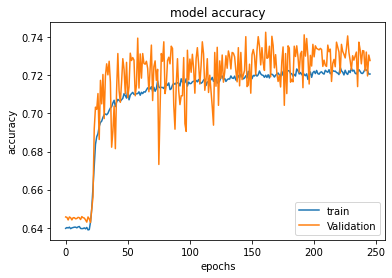

In [10]:
# Vẽ lại quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [12]:
test = np.array([[45,45],[90,90]])
y_predict = model.predict(test)
print(y_predict)

[[49.33065   -4.9008226]
 [58.688065  -2.3834212]]
